In [411]:
import pandas as pd
import numpy as np
import time
import re

tweets_df = pd.read_csv(r'C:\Users\CHISA\Downloads\twitter_data.csv')
tweets_df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet
0,2023-02-27 03:01:37+00:00,41226,Twitter for iPhone,is there any other way to be? https://t.co/P0n...
1,2023-01-06 23:48:42+00:00,19243,Twitter Web App,I prefer screams of agony. https://t.co/UDwZsk...
2,2023-01-06 17:00:31+00:00,133634,Twitter Media Studio,More torture is coming. Lucky you. https://t.c...
3,2023-01-06 03:53:50+00:00,123,Twitter for iPhone,@SMediaProd01 @netflix Indeed
4,2023-01-03 19:45:48+00:00,16836,Twitter Web App,Your daughters are correct. As the saying goes...


In [412]:
for col in tweets_df.columns:
    pct_missing = np.mean(tweets_df[col].isnull())
    print('{}- {}%'.format(col, pct_missing))

Date Created- 0.0%
Number of Likes- 0.0%
Source of Tweet- 0.0%
Tweet- 0.0%


In [413]:
# checking the data type of every columns
tweets_df.dtypes

Date Created       object
Number of Likes     int64
Source of Tweet    object
Tweet              object
dtype: object

In [414]:
tweets_df.count()

Date Created       90
Number of Likes    90
Source of Tweet    90
Tweet              90
dtype: int64

In [415]:
tweets_df.dropna().head()

,Date Created,Number of Likes,Source of Tweet,Tweet
0,2023-02-27 03:01:37+00:00,41226,Twitter for iPhone,is there any other way to be? https://t.co/P0n...
1,2023-01-06 23:48:42+00:00,19243,Twitter Web App,I prefer screams of agony. https://t.co/UDwZsk...
2,2023-01-06 17:00:31+00:00,133634,Twitter Media Studio,More torture is coming. Lucky you. https://t.c...
3,2023-01-06 03:53:50+00:00,123,Twitter for iPhone,@SMediaProd01 @netflix Indeed
4,2023-01-03 19:45:48+00:00,16836,Twitter Web App,Your daughters are correct. As the saying goes...


In [416]:
pd.set_option('display.max_row', None)
tweets_df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet
0,2023-02-27 03:01:37+00:00,41226,Twitter for iPhone,is there any other way to be? https://t.co/P0n...
1,2023-01-06 23:48:42+00:00,19243,Twitter Web App,I prefer screams of agony. https://t.co/UDwZsk...
2,2023-01-06 17:00:31+00:00,133634,Twitter Media Studio,More torture is coming. Lucky you. https://t.c...
3,2023-01-06 03:53:50+00:00,123,Twitter for iPhone,@SMediaProd01 @netflix Indeed
4,2023-01-03 19:45:48+00:00,16836,Twitter Web App,Your daughters are correct. As the saying goes...


In [417]:
tweets_df['Year'] = tweets_df['Date Created'].str.extract(pat = '([0-9]{4})').astype(int)
tweets_df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Year
0,2023-02-27 03:01:37+00:00,41226,Twitter for iPhone,is there any other way to be? https://t.co/P0n...,2023
1,2023-01-06 23:48:42+00:00,19243,Twitter Web App,I prefer screams of agony. https://t.co/UDwZsk...,2023
2,2023-01-06 17:00:31+00:00,133634,Twitter Media Studio,More torture is coming. Lucky you. https://t.c...,2023
3,2023-01-06 03:53:50+00:00,123,Twitter for iPhone,@SMediaProd01 @netflix Indeed,2023
4,2023-01-03 19:45:48+00:00,16836,Twitter Web App,Your daughters are correct. As the saying goes...,2023


In [418]:
new_tweet = tweets_df.drop_duplicates('Tweet', keep='first')
new_tweet.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Year
0,2023-02-27 03:01:37+00:00,41226,Twitter for iPhone,is there any other way to be? https://t.co/P0n...,2023
1,2023-01-06 23:48:42+00:00,19243,Twitter Web App,I prefer screams of agony. https://t.co/UDwZsk...,2023
2,2023-01-06 17:00:31+00:00,133634,Twitter Media Studio,More torture is coming. Lucky you. https://t.c...,2023
3,2023-01-06 03:53:50+00:00,123,Twitter for iPhone,@SMediaProd01 @netflix Indeed,2023
4,2023-01-03 19:45:48+00:00,16836,Twitter Web App,Your daughters are correct. As the saying goes...,2023


In [419]:
new_tweet.to_csv(r'C:\Users\CHISA\Downloads\tweets_data.csv', index = False)
pd.read_csv(r'C:\Users\CHISA\Downloads\tweets_data.csv')

new_tweet
tweets = new_tweet['Tweet']
pd.set_option('display.float_format', lambda x: '%.5f' % x)
 
tweets.head()

0    is there any other way to be? https://t.co/P0n...
1    I prefer screams of agony. https://t.co/UDwZsk...
2    More torture is coming. Lucky you. https://t.c...
3                        @SMediaProd01 @netflix Indeed
4    Your daughters are correct. As the saying goes...
Name: Tweet, dtype: object

In [420]:
#new_tweet['Tweet'] = new_tweet['Tweet'].astype(str)
#tweets['Tweet'] = new_tweet['Tweet'].str.replace('@', '')
#tweets

In [421]:
import html
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [422]:
for i in range (len(tweets)):
    x = tweets[i].replace("\n"," ")
    tweets[i] =html.unescape(x)
    tweets

In [423]:
for i in range (len(tweets)):
    tweets[i] = re.sub(r"(@[A-Za-z0-9]+)|[^\w\s]|#|http\S+"," ", tweets[i])
    tweets

In [424]:
new_tweet['Tweet'].replace(['tweets'])
new_tweet.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Year
0,2023-02-27 03:01:37+00:00,41226,Twitter for iPhone,is there any other way to be,2023
1,2023-01-06 23:48:42+00:00,19243,Twitter Web App,I prefer screams of agony,2023
2,2023-01-06 17:00:31+00:00,133634,Twitter Media Studio,More torture is coming Lucky you,2023
3,2023-01-06 03:53:50+00:00,123,Twitter for iPhone,Indeed,2023
4,2023-01-03 19:45:48+00:00,16836,Twitter Web App,Your daughters are correct As the saying goes...,2023


In [425]:
from datetime import datetime
new_tweet['Date Created']=pd.to_datetime(new_tweet['Date Created'])
new_tweet['Date Created']=new_tweet['Date Created'].dt.strftime('%Y-%m-%d')
new_tweet.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Year
0,2023-02-27,41226,Twitter for iPhone,is there any other way to be,2023
1,2023-01-06,19243,Twitter Web App,I prefer screams of agony,2023
2,2023-01-06,133634,Twitter Media Studio,More torture is coming Lucky you,2023
3,2023-01-06,123,Twitter for iPhone,Indeed,2023
4,2023-01-03,16836,Twitter Web App,Your daughters are correct As the saying goes...,2023


In [426]:
new_tweet.to_csv(r'C:\Users\CHISA\Downloads\tweets_clean.csv', index = False)

new_tweet = pd.read_csv(r'C:\Users\CHISA\Downloads\tweets_clean.csv')

new_tweet.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Year
0,2023-02-27,41226,Twitter for iPhone,is there any other way to be,2023
1,2023-01-06,19243,Twitter Web App,I prefer screams of agony,2023
2,2023-01-06,133634,Twitter Media Studio,More torture is coming Lucky you,2023
3,2023-01-06,123,Twitter for iPhone,Indeed,2023
4,2023-01-03,16836,Twitter Web App,Your daughters are correct As the saying goes...,2023


In [427]:
new_tweet.sort_values(by=['Year'], inplace=True, ascending=False)
new_tweet.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Year
0,2023-02-27,41226,Twitter for iPhone,is there any other way to be,2023
2,2023-01-06,133634,Twitter Media Studio,More torture is coming Lucky you,2023
3,2023-01-06,123,Twitter for iPhone,Indeed,2023
4,2023-01-03,16836,Twitter Web App,Your daughters are correct As the saying goes...,2023
1,2023-01-06,19243,Twitter Web App,I prefer screams of agony,2023


In [428]:
# removing stopwords
tweets_to_token = tweets
sw = stopwords.words('english')
sw.remove('not')

In [429]:
#tokenize the tweets
pd.options.mode.chained_assignment = None
for i in range(len(tweets_to_token)):
    tweets_to_token[i] = word_tokenize(tweets_to_token[i])

In [430]:
# ending the stopwords
for i in range(len(tweets_to_token)):
    tweets_to_token[i] = [word for word in tweets_to_token[i] 
      if not word in sw]
    tweets_to_token

In [431]:
import seaborn as sns
import matplotlib.pyplot as plt
new_tweet_numerized = new_tweet
for col_name in new_tweet_numerized.columns:
    if(new_tweet_numerized[col_name].dtype == 'object'):
        new_tweet_numerized[col_name] = new_tweet_numerized[col_name].astype('category')
        new_tweet_numerized[col_name] = new_tweet_numerized[col_name].cat.codes
new_tweet_numerized.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Year
0,35,41226,3,88,2023
2,34,133634,1,51,2023
3,34,123,3,3,2023
4,33,16836,2,86,2023
1,34,19243,2,39,2023


In [432]:
new_tweet[['Date Created', 'Number of Likes', 'Source of Tweet', 'Tweet', 'Year', ]].dropna().corr()

,Date Created,Number of Likes,Source of Tweet,Tweet,Year
Date Created,1.00000,0.32131,-0.11562,-0.09944,0.42875
Number of Likes,0.32131,1.00000,-0.35000,-0.08883,0.24908
Source of Tweet,-0.11562,-0.35000,1.00000,0.04661,0.17783
Tweet,-0.09944,-0.08883,0.04661,1.00000,0.08913
Year,0.42875,0.24908,0.17783,0.08913,1.00000


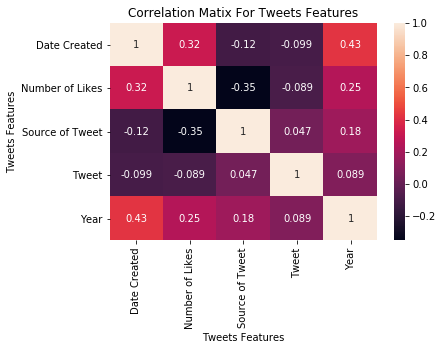

In [436]:
correlation_matrix= new_tweet_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matix For Tweets Features')
plt.xlabel('Tweets Features')
plt.ylabel('Tweets Features')
plt.show()

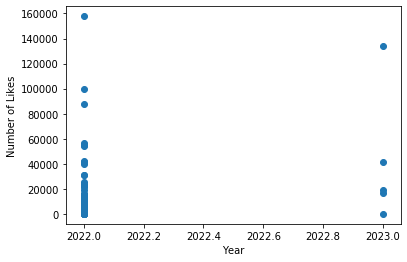

In [439]:
plt.scatter(x=new_tweet['Year'], y=new_tweet['Number of Likes'])
plt.xlabel('Year')
plt.ylabel('Number of Likes')
plt.show()

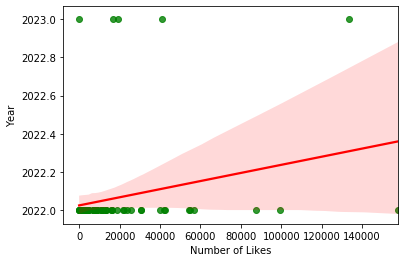

In [435]:
sns.regplot(x='Number of Likes', y='Year', data=new_tweet, scatter_kws={"color": "green"}, line_kws={"color":"red"})
plt.show()